                Pokes_before_correct                                          \
                               count      mean       std   min     25%   50%   
Genotype Age                                                                   
APPPS1   3 mois                  8.0  3.112500  0.739339  1.91  2.6550  3.20   
         4 mois                  6.0  3.423333  0.805597  2.31  2.8625  3.50   
WT       3 mois                  5.0  2.512000  0.236263  2.11  2.5300  2.59   
         4 mois                  1.0  2.710000       NaN  2.71  2.7100  2.71   

                              Non-requested pokes              ...  \
                    75%   max               count        mean  ...   
Genotype Age                                                   ...   
APPPS1   3 mois  3.7025  3.98                 6.0   43.833333  ...   
         4 mois  4.0400  4.36                 6.0   44.333333  ...   
WT       3 mois  2.6000  2.73                 4.0  131.000000  ...   
         4 mois  2.

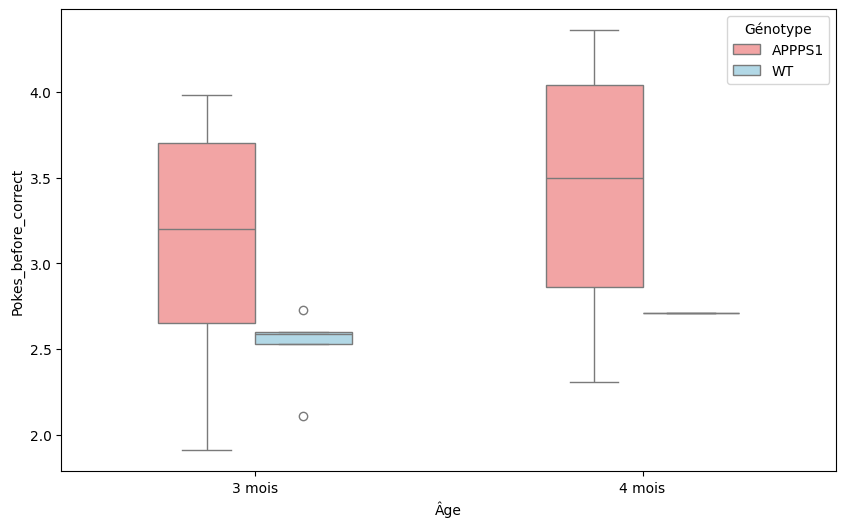

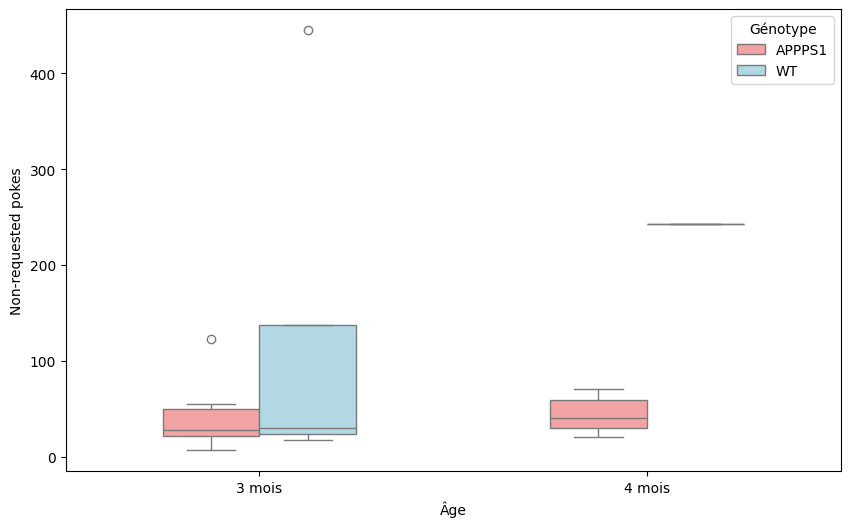

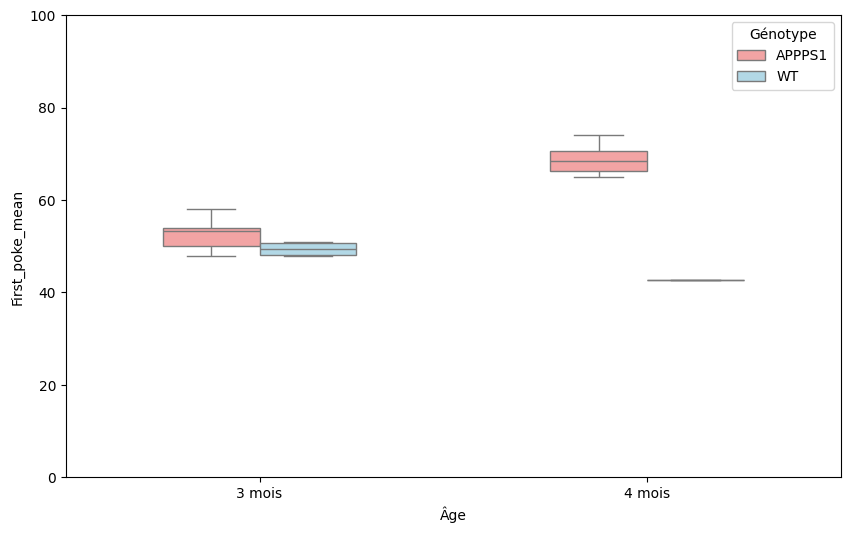

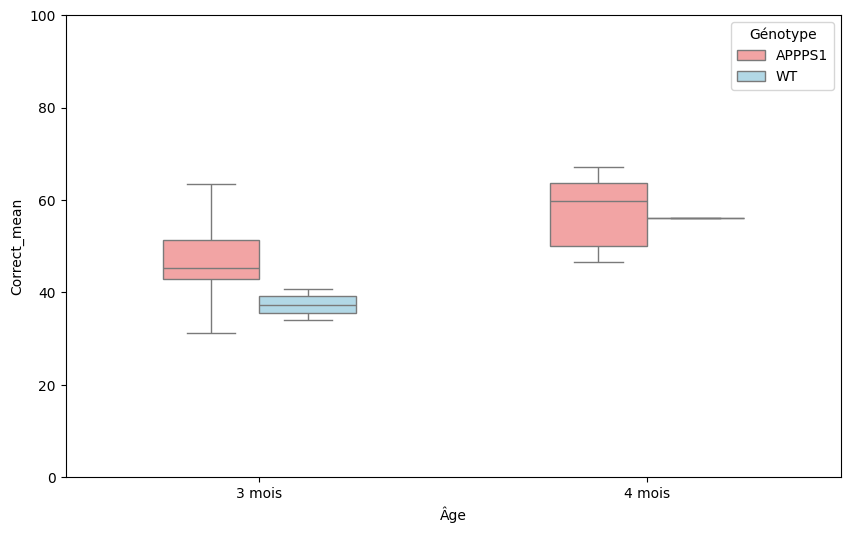

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Étape 1 : Spécifiez directement le chemin du fichier CSV
file_path = "C:/Users/AudreyHay/Documents/Carla/FED/Light Tracking/Summary_FED.csv"  # Remplacez par le chemin complet de votre fichier
data = pd.read_csv(file_path)

# Étape 2 : Calculs des paramètres personnalisés (moyenne)
data['First_poke_mean'] = data[['Night 1_first_Poke', 'Day 1_first_Poke', 'Night 2_first_Poke']].mean(axis=1)
data['Correct_mean'] = data[['Night 1_correct', 'Day 1_correct', 'Night 2_correct']].mean(axis=1)

# Étape 3 : Analyse descriptive
descriptive_stats = data.groupby(['Genotype', 'Age'])[['Pokes_before_correct', 'Non-requested pokes', 'First_poke_mean', 'Correct_mean']].describe()
print(descriptive_stats)

# Étape 4 : Graphiques de boîtes à moustaches avec points des souris alignés
parameters = ['Pokes_before_correct', 'Non-requested pokes', 'First_poke_mean', 'Correct_mean']
for parameter in parameters:
    plt.figure(figsize=(10, 6))
    
    # Boîte à moustaches
    sns.boxplot(
        x='Age', 
        y=parameter, 
        hue='Genotype', 
        data=data, 
        showmeans=False, 
        width=0.5,  # Réduction de la largeur des boîtes
        palette={'WT': '#A9DCEF', 'APPPS1': '#FF9797'}
    )
    

    # Fixer les axes des ordonnées entre 0 et 100 pour Correct_mean et First_poke_mean
    if parameter in ['Correct_mean', 'First_poke_mean']:
        plt.ylim(0, 100)



    
    # Points pour chaque souris (correctement alignés)
    #sns.stripplot(
     #   x='Age', 
      #  y=parameter, 
       # hue='Genotype', 
        #data=data, 
    #    dodge=True,  # Permet de positionner correctement les points pour chaque génotype
     #   marker='o', 
      #  size=8, 
       # palette={'WT': '#A9DCEF', 'APPPS1': '#FF9797'},  # Les mêmes couleurs que les boîtes
     #   alpha=0.6,  # Transparence ajustée pour meilleure lisibilité
      #  jitter=False  # Supprime toute dispersion pour que les points soient bien alignés

    
    # Ajustement de la légende pour éviter les doublons
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[:2], labels[:2], title="Génotype")
    
    #plt.title(f"Boîte à moustaches et points alignés pour {parameter}")
    plt.xlabel("Âge")
    plt.ylabel(parameter)
    plt.show()
